# Image Recognition

## Importing libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("Training_set_animals.csv")
test_data = pd.read_csv("Testing_set_animals.csv")

In [3]:
train_data.head()

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [4]:
test_data.head()

,Image_1.jpg
0,Image_2.jpg
1,Image_3.jpg
2,Image_4.jpg
3,Image_5.jpg
4,Image_6.jpg


In [5]:
train_data.shape

(1200, 2)

In [6]:
test_data.shape

(399, 1)

In [7]:
print(train_data.iloc[578])

filename       Image_579.jpg
animal_type            mucca
Name: 578, dtype: object


In [8]:
image_paths = ['./train_beg/' + fname for fname in train_data['filename']]
image_paths # will get list of list of image id and image path

"""
The reason behind using the filename from train_labels is that
- it will help you to get all the images whose labels we already have in train_labels.
- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are
in some specific order, this will help you load all the images location in the list in the same order.
"""

'\nThe reason behind using the filename from train_labels is that\n- it will help you to get all the images whose labels we already have in train_labels.\n- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are\nin some specific order, this will help you load all the images location in the list in the same order.\n'

In [9]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_data) == len(image_paths):
    print('Number of labels i.e. ', len(train_data), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print("Number of labels does not match the number of filepat")

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


In [10]:
train_data = pd.DataFrame({'filename': train_data['filename'], 'filepath': image_paths, 'animal_type': train_data['animal_type']})
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,./train_beg/Image_1.jpg,mucca
1,Image_2.jpg,./train_beg/Image_2.jpg,mucca
2,Image_3.jpg,./train_beg/Image_3.jpg,mucca
3,Image_4.jpg,./train_beg/Image_4.jpg,mucca
4,Image_5.jpg,./train_beg/Image_5.jpg,mucca


In [11]:
print(train_data.iloc[578])

filename                   Image_579.jpg
filepath       ./train_beg/Image_579.jpg
animal_type                        mucca
Name: 578, dtype: object


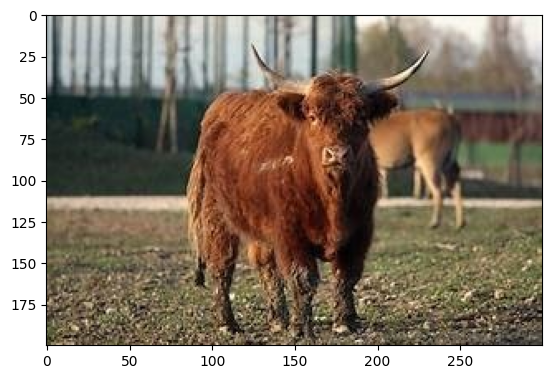

In [12]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread(train_data.iloc[578]["filepath"], cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [13]:
# animal_type of above image
# write a Python script here that would return you the animal_type of above image
print(train_data.iloc[578]['animal_type'])

mucca


In [14]:
# Well we are set, but there is a trick, Machine/Deep Learning models doesn't accept images, they accepts only numbers. We need to convert these images to their pixel values so that we can apply ML/DL Models. We can achieve this using cv2 (OpenCV) library.

## Loading Image's Pixel Values
### OpenCV's imread method helps in reading an image and getting its pixel values. You just need to provide the path of each image inside imread().

### Finally, store the image as well as its label inside data.

In [15]:
data = [] # initialize a list to store, each image's pixel values
labels = [] # initialize a list to store each image's labels i.e. animal type
for i in range(len(train_data)):
    aux = cv2.imread(train_data['filepath'][i]) # for each i starting from 0, convert the ith image to array of pixels
    image_arr = cv2.cvtColor(aux,cv2.COLOR_BGR2RGB)
    data.append(image_arr)
# We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
# Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
    if train_data['animal_type'][i] == 'mucca': # if respective image's label is mucca
     labels.append(0)
    else: # since there are only two type of animals, if the animal is not mucca, it will be pecora
     labels.append(1) # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again

In [16]:
# data and labels are in normal python list, you must convert it to numpy array. You can do it using a single command!
data = np.array(data)
labels = np.array(labels)
print(f'data shape = {data.shape}')
print(f'label data shape = {labels.shape}')

data shape = (1200, 200, 300, 3)
label data shape = (1200,)


In [17]:
len(labels)

1200

## Display image using pixel values
### Using imshow from mtaplotlib.pyplot you can display an image using those pixel values

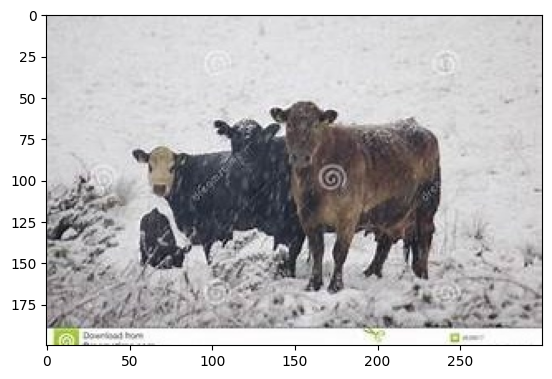

In [18]:
plt.imshow(data[0])

In [19]:
print(labels[0])

0


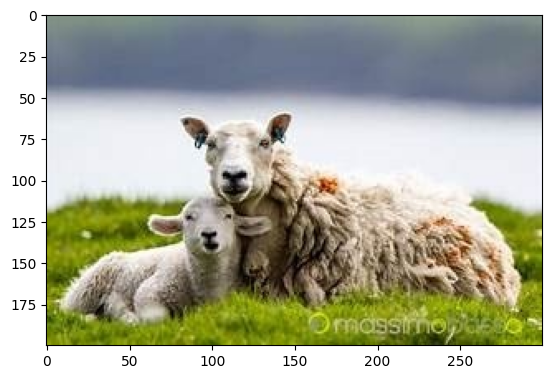

In [20]:
plt.imshow(data[900])

In [21]:
print(labels[900])

1


In [22]:
# Can split data using train_test_split
from sklearn.model_selection import train_test_split

# Assign variables to capture train test split output
trainFigures, testFigures, trainLabels, testLabels = train_test_split(data, labels, test_size=0.2, random_state=42)
print(f'trainFigures shape = {trainFigures.shape}')
print(f'trainLabels shape = {trainLabels.shape}')
print(f'testFigures shape = {testFigures.shape}')
print(f'testLabels shape = {testLabels.shape}')

trainFigures shape = (960, 200, 300, 3)
trainLabels shape = (960,)
testFigures shape = (240, 200, 300, 3)
testLabels shape = (240,)


In [23]:
# definir el tamaño de la imagen
INPUT_SHAPE = (200, 300, 3)

# definir el modelo como secuencial
model = tf.keras.models.Sequential()
# definir conv-pool capas - conjunto 1
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# definir conv-pool capas - conjunto 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE
))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# agregar una capa plana
model.add(tf.keras.layers.Flatten())

# agregue capas densas con un poco de perdida
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
#model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.5))

# agregar una capa de salida
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



# visualizar las capas del modelo
model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 149, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 147, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,352,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,362,785 (54.79 MB)

 Trainable params: 14,362,785 (54.79 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# compilar modelo
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [26]:
EPOCHS = 100
train_images_scaled = trainFigures / 255.0
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,
restore_best_weights=True,
verbose=1)
history = model.fit(train_images_scaled, trainLabels,
batch_size=32,
callbacks=[es_callback],
validation_split=0.1, epochs=EPOCHS,
verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7555 - loss: 0.5388 - val_accuracy: 0.6667 - val_loss: 0.6369
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 974ms/step - accuracy: 0.8642 - loss: 0.4014 - val_accuracy: 0.6667 - val_loss: 0.6685
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 897ms/step - accuracy: 0.9240 - loss: 0.2587 - val_accuracy: 0.6458 - val_loss: 0.7522
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 998ms/step - accuracy: 0.9774 - loss: 0.0991 - val_accuracy: 0.7083 - val_loss: 0.8295
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


### Loading the Test Data

In [35]:
test_image_labels = pd.read_csv("./Testing_set_animals.csv", names=["filename"])

In [36]:
# Get labels
image_path = ["./test_beg/" + fname for fname in test_image_labels["filename"]]


In [32]:
len(image_path) == len(test_image_labels)

True

In [38]:
test_image_labels = pd.DataFrame({"filename": test_image_labels["filename"], 'filepath': image_path})
test_image_labels.head()

,filename,filepath
0,Image_1.jpg,./test_beg/Image_1.jpg
1,Image_2.jpg,./test_beg/Image_2.jpg
2,Image_3.jpg,./test_beg/Image_3.jpg
3,Image_4.jpg,./test_beg/Image_4.jpg
4,Image_5.jpg,./test_beg/Image_5.jpg


In [39]:
# Load image pixels using cv2
image_pixels = []
for i in range(len(test_image_labels)):
    img_array = cv2.imread(test_image_labels['filepath'][i])
    image_pixels.append(img_array)


In [40]:
test_images_scaled = np.array(image_pixels) / 255.
pred = model.predict(test_images_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step


In [41]:
# prediction
print(pred[180])
print(testLabels[180])

[0.7126014]
1


In [42]:
prediction = []
for value in pred:
    if value <= 0.5:
        prediction.append(0) # it can be 0 or your respective class 'mucca'
    else:
        prediction.append(1) # it can be 1 or your respective class 'pecora'

In [43]:
predictions = np.round(pred)
prediction = []
for item in pred:
    prediction.append(item)

In [44]:
# prediction
print(pred[180])
print(testLabels[180])

[0.7126014]
1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


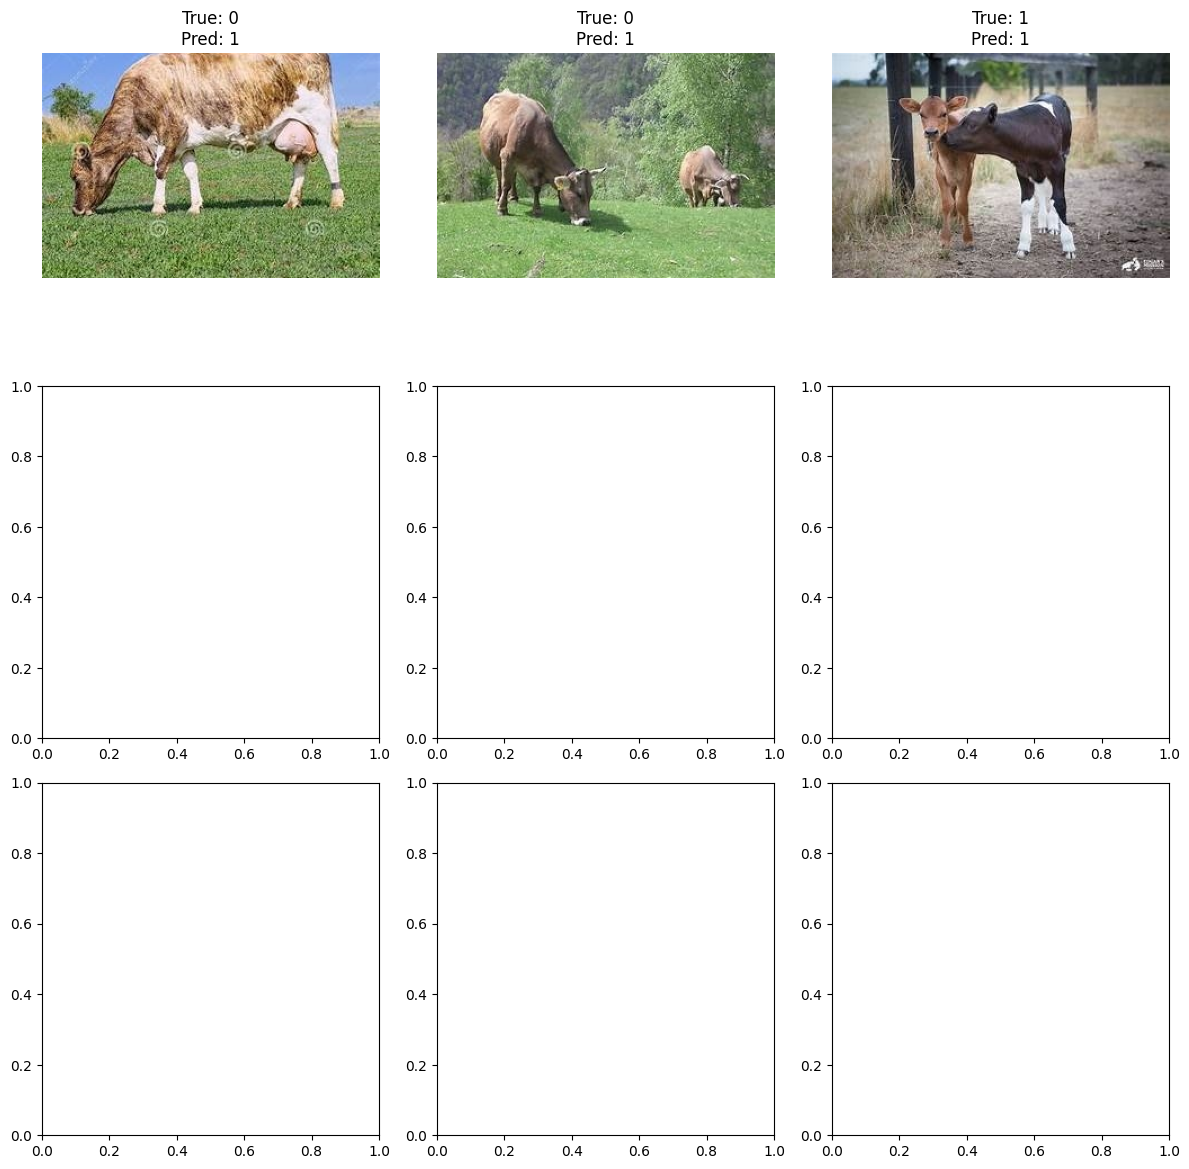

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

# Number of images to display
num_images_to_display = 9

# Ensure the number of images to display does not exceed the available data
num_images_to_display = min(num_images_to_display, len(test_images_scaled))

# Randomly select indices within the valid range
indices = random.sample(range(len(test_images_scaled)), num_images_to_display)

# Ensure indices are within the valid range
indices = [idx for idx in indices if idx < len(testLabels)]

# Extract the images and labels for these indices
sample_images = test_images_scaled[indices]
sample_labels = [testLabels[idx] for idx in indices]  # Correctly extract labels
sample_predictions = model.predict(sample_images)

# Set up the plot
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# Display images with actual and predicted labels
for i, idx in enumerate(indices):
    img_path = train_data.iloc[idx]['filepath']  # Get the file path of the image
    img = cv2.imread(img_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB
    
    ax = axes[i]
    ax.imshow(img)  # Display the image
    ax.axis('off')  # Hide the axes

    # Convert predictions to binary label if necessary
    pred_label = (sample_predictions[i] > 0.5).astype(int)  # Assuming binary classification with sigmoid activation

    # Display the actual and predicted labels
    ax.set_title(f"True: {sample_labels[i]}\nPred: {pred_label[0]}")

# Adjust layout
plt.tight_layout()
plt.show()


How to save prediciton results locally via jupyter notebook?
If you are working on Jupyter notebook, execute below block of codes. A file named ‘submission.csv’ will be created in your current working directory.

res = pd.DataFrame({'filename': test_data ['filename'], 'animal_type': prediction}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv")

In [52]:
result = pd.DataFrame({'filename': test_image_labels['filename'], 'animal_type': prediction}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
result.to_csv("image_recognition_model.csv")